In [51]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

from tensorflow_addons.metrics import RSquare

In [52]:
!pip install tensorflow-addons

Defaulting to user installation because normal site-packages is not writeable


In [53]:
data =  pd.read_csv('vgsales.csv', index_col='Rank')

In [54]:
data

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01


In [55]:
data.shape

(16598, 10)

In [56]:
# preprocessing

In [57]:
columns_to_drop = ['Name' , 'NA_Sales' , 'EU_Sales' , 'JP_Sales' , 'Other_Sales']

data.drop(columns_to_drop, axis= 1 , inplace = True)

In [58]:
data

,Platform,Year,Genre,Publisher,Global_Sales
Rank,,,,,
1,Wii,2006.0,Sports,Nintendo,82.74
2,NES,1985.0,Platform,Nintendo,40.24
3,Wii,2008.0,Racing,Nintendo,35.82
4,Wii,2009.0,Sports,Nintendo,33.00
5,GB,1996.0,Role-Playing,Nintendo,31.37
...,...,...,...,...,...
16596,GBA,2002.0,Platform,Kemco,0.01
16597,GC,2003.0,Shooter,Infogrames,0.01
16598,PS2,2008.0,Racing,Activision,0.01


In [59]:
data.isnull().sum()

Platform          0
Year            271
Genre             0
Publisher        58
Global_Sales      0
dtype: int64

In [60]:
data.isna().sum()

Platform          0
Year            271
Genre             0
Publisher        58
Global_Sales      0
dtype: int64

In [61]:
data['Year'] = data['Year'].fillna(data['Year'].mean())

In [62]:
data

,Platform,Year,Genre,Publisher,Global_Sales
Rank,,,,,
1,Wii,2006.0,Sports,Nintendo,82.74
2,NES,1985.0,Platform,Nintendo,40.24
3,Wii,2008.0,Racing,Nintendo,35.82
4,Wii,2009.0,Sports,Nintendo,33.00
5,GB,1996.0,Role-Playing,Nintendo,31.37
...,...,...,...,...,...
16596,GBA,2002.0,Platform,Kemco,0.01
16597,GC,2003.0,Shooter,Infogrames,0.01
16598,PS2,2008.0,Racing,Activision,0.01


In [63]:
data  = data.dropna(axis = 0 )

In [64]:
data.isna().sum()

Platform        0
Year            0
Genre           0
Publisher       0
Global_Sales    0
dtype: int64

In [65]:
data

,Platform,Year,Genre,Publisher,Global_Sales
Rank,,,,,
1,Wii,2006.0,Sports,Nintendo,82.74
2,NES,1985.0,Platform,Nintendo,40.24
3,Wii,2008.0,Racing,Nintendo,35.82
4,Wii,2009.0,Sports,Nintendo,33.00
5,GB,1996.0,Role-Playing,Nintendo,31.37
...,...,...,...,...,...
16596,GBA,2002.0,Platform,Kemco,0.01
16597,GC,2003.0,Shooter,Infogrames,0.01
16598,PS2,2008.0,Racing,Activision,0.01


In [66]:
# encoding

In [67]:
data['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [68]:
data['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [69]:
counts = data['Publisher'].value_counts()

data['Publisher'] = data['Publisher'].apply(lambda x:'Small Publisher' if counts[x] < 50 else x)

C:\Users\umair\AppData\Local\Temp\ipykernel_10184\3173700912.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Publisher'] = data['Publisher'].apply(lambda x:'Small Publisher' if counts[x] < 50 else x)


In [70]:
data

,Platform,Year,Genre,Publisher,Global_Sales
Rank,,,,,
1,Wii,2006.0,Sports,Nintendo,82.74
2,NES,1985.0,Platform,Nintendo,40.24
3,Wii,2008.0,Racing,Nintendo,35.82
4,Wii,2009.0,Sports,Nintendo,33.00
5,GB,1996.0,Role-Playing,Nintendo,31.37
...,...,...,...,...,...
16596,GBA,2002.0,Platform,Small Publisher,0.01
16597,GC,2003.0,Shooter,Infogrames,0.01
16598,PS2,2008.0,Racing,Activision,0.01


In [71]:
onehot_columns = ['Platform' , 'Genre' , 'Publisher']

In [72]:
def onehot_encode(data, columns):
    for column in columns :
        dummies  = pd.get_dummies(data[column])
        data = pd.concat([data , dummies] , axis = 1 )
        data.drop(column , axis = 1 , inplace = True )
    return data

In [73]:
data = onehot_encode(data , onehot_columns)

In [74]:
data

,Year,Global_Sales,2600,3DO,3DS,DC,DS,GB,GBA,GC,...,SquareSoft,THQ,Take-Two Interactive,Tecmo Koei,Ubisoft,Unknown,Virgin Interactive,Vivendi Games,Warner Bros. Interactive Entertainment,Zoo Digital Publishing
Rank,,,,,,,,,,,,,,,,,,,,,
1,2006.0,82.74,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1985.0,40.24,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2008.0,35.82,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2009.0,33.00,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,1996.0,31.37,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16596,2002.0,0.01,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
16597,2003.0,0.01,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
16598,2008.0,0.01,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [75]:
# scalling

In [76]:
X = data.drop('Global_Sales' , axis =1 )
y = data['Global_Sales']

In [77]:
X

,Year,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,...,SquareSoft,THQ,Take-Two Interactive,Tecmo Koei,Ubisoft,Unknown,Virgin Interactive,Vivendi Games,Warner Bros. Interactive Entertainment,Zoo Digital Publishing
Rank,,,,,,,,,,,,,,,,,,,,,
1,2006.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1985.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2008.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2009.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,1996.0,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16596,2002.0,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
16597,2003.0,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
16598,2008.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [78]:
scaler = StandardScaler()

In [79]:
X = scaler.fit_transform(X)

In [80]:
# training

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [82]:
inputs = tf.keras.Input(shape=(91,))
x = tf.keras.layers.Dense(128, activation='relu')(inputs)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(1)(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)


optimizer = tf.keras.optimizers.RMSprop(0.001)

model.compile(
    optimizer=optimizer,
    loss='mse'
)


batch_size = 64
epochs = 91

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    verbose=0
)

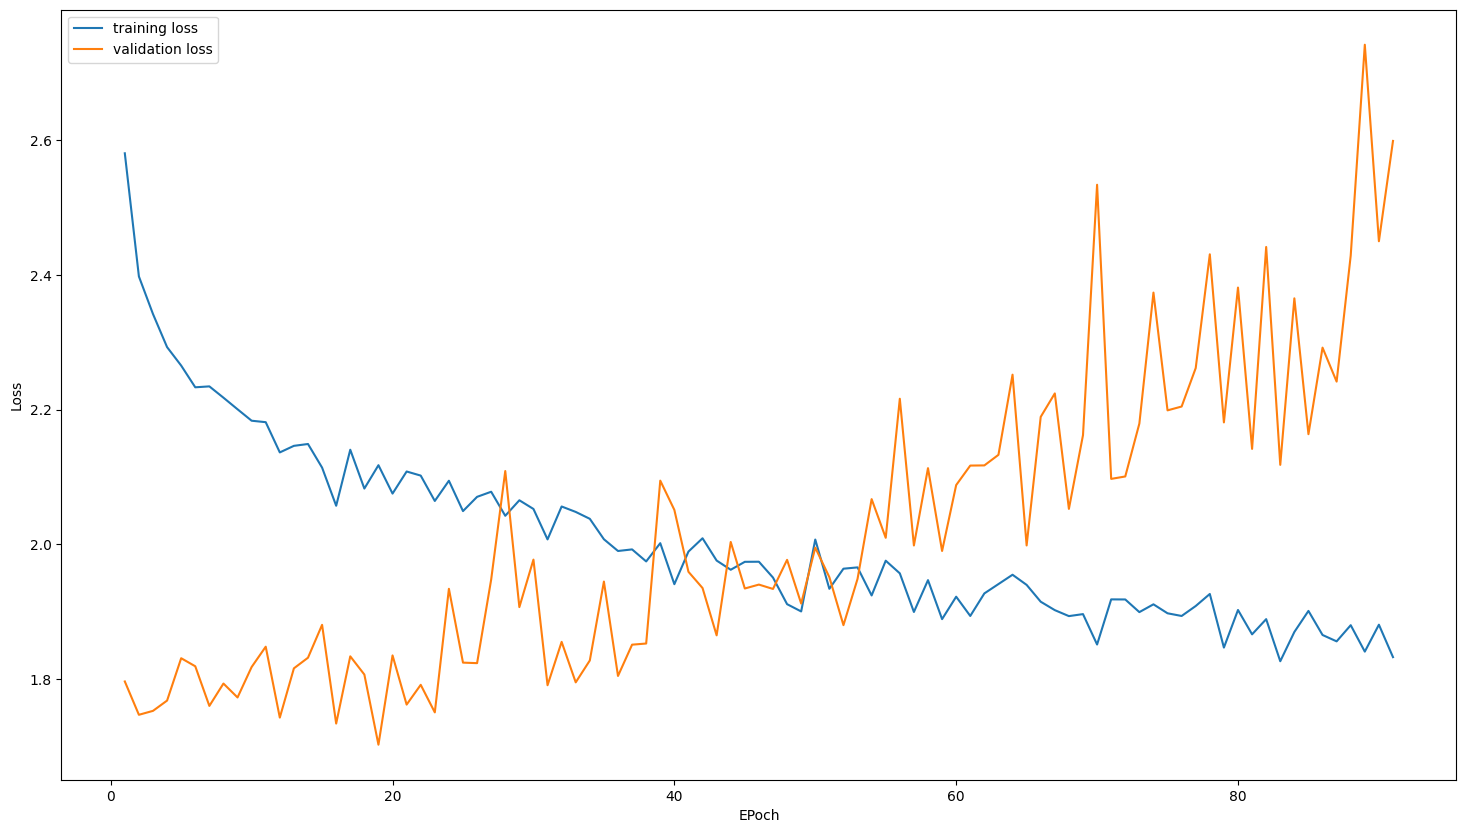

In [83]:
plt.figure(figsize= (18, 10))

epochs_range = range(1, epochs +1)
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs_range , train_loss , label = "training loss")
plt.plot(epochs_range , val_loss , label ='validation loss')

plt.xlabel('EPoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [84]:
np.argmin(val_loss)

18

In [85]:
y_pred = np.squeeze(model.predict(X_test))

result = RSquare()
result.update_state(y_test, y_pred)

print("R^2 Score:", result.result())

104/104 [==============================] - 0s 2ms/step
R^2 Score: tf.Tensor(-0.3178215, shape=(), dtype=float32)


In [86]:
model.evaluate(X_test, y_test)

104/104 [==============================] - 0s 2ms/step - loss: 2.2452


2.245218515396118

In [87]:
history.history['val_loss']

[1.7960602045059204,
 1.7465556859970093,
 1.7523926496505737,
 1.767685890197754,
 1.8305778503417969,
 1.8186147212982178,
 1.759728193283081,
 1.7929704189300537,
 1.7722867727279663,
 1.817528486251831,
 1.8476990461349487,
 1.7423772811889648,
 1.8155558109283447,
 1.8313313722610474,
 1.880162239074707,
 1.7334972620010376,
 1.8333791494369507,
 1.8063467741012573,
 1.702093243598938,
 1.8347549438476562,
 1.7617055177688599,
 1.7910661697387695,
 1.7501200437545776,
 1.9336799383163452,
 1.8240355253219604,
 1.823264718055725,
 1.9474610090255737,
 2.108614921569824,
 1.9064881801605225,
 1.9770615100860596,
 1.7904545068740845,
 1.8548628091812134,
 1.7947230339050293,
 1.8272347450256348,
 1.9444224834442139,
 1.8042298555374146,
 1.8507014513015747,
 1.8524110317230225,
 2.0943634510040283,
 2.0508720874786377,
 1.958967924118042,
 1.9348435401916504,
 1.8645392656326294,
 2.0032739639282227,
 1.9341503381729126,
 1.9399538040161133,
 1.9334839582443237,
 1.9767032861709595,
